In [31]:
import matplotlib.pyplot as plt
import re

In [32]:
#记录每条流每时的速率
flows = {}
#flows[12] = [1,2]
#print(flows[12])

In [33]:
#按行读取文件
file_path = 'DQN_RES3'
#file_path = 'AFQ_RES5'
with open(file_path) as f:
    for line in f:
        # print(line)
        result = re.match(r'\[ (\d)*\].*',line)
        if result:
            # print(result.group())
            # print(re.search(r'\[ (\d)*\]',line).group())
            index = re.search(r'\[ (\d)*\]',line).group()
            if index not in flows:
                flows[index] = []
                # print(index)
            else:
                value = re.search(r'(((\d)*)((\.)?)((\d)*) Mbits/sec)|(((\d)*)((\.)?)((\d)*) Kbits/sec)',line)
                if value:
                    value = value.group()
                    # print(index,value)
                    flows[index].append(value)
print(flows)

{'[ 12]': ['835 Kbits/sec', '70.6 Kbits/sec', '94.1 Kbits/sec', '82.3 Kbits/sec', '129 Kbits/sec', '118 Kbits/sec', '94.1 Kbits/sec', '94.1 Kbits/sec', '129 Kbits/sec', '47.0 Kbits/sec', '129 Kbits/sec', '165 Kbits/sec'], '[ 13]': ['58.8 Kbits/sec', '94.1 Kbits/sec', '70.6 Kbits/sec', '129 Kbits/sec', '118 Kbits/sec', '94.1 Kbits/sec', '94.1 Kbits/sec', '118 Kbits/sec', '82.3 Kbits/sec', '118 Kbits/sec', '94.7 Kbits/sec'], '[ 14]': ['58.8 Kbits/sec', '82.3 Kbits/sec', '70.6 Kbits/sec', '129 Kbits/sec', '141 Kbits/sec', '94.1 Kbits/sec', '94.1 Kbits/sec', '118 Kbits/sec', '58.8 Kbits/sec', '129 Kbits/sec', '92.7 Kbits/sec'], '[ 15]': ['47.0 Kbits/sec', '94.1 Kbits/sec', '82.3 Kbits/sec', '118 Kbits/sec', '129 Kbits/sec', '106 Kbits/sec', '82.3 Kbits/sec', '141 Kbits/sec', '47.0 Kbits/sec', '118 Kbits/sec', '93.7 Kbits/sec'], '[ 16]': ['58.8 Kbits/sec', '94.1 Kbits/sec', '70.6 Kbits/sec', '118 Kbits/sec', '129 Kbits/sec', '94.1 Kbits/sec', '82.3 Kbits/sec', '129 Kbits/sec', '58.8 Kbits/s

In [34]:
for index in flows:
    # print(flows[index])
    for ind,value in enumerate(flows[index]):
        # print(ind,value)
        if value[-9:] == 'Mbits/sec':
            # print(ind,value)
            value = float(value[:-9])
            value *= 1000
            flows[index][ind] = value
        elif value[-9:] == 'Kbits/sec':
            value = float(value[:-9])
            flows[index][ind] = value
            
#数据对齐 dqn
flows['[ 12]'] = flows['[ 12]'][1:]
#flows['[ 13]'] = flows['[ 13]'][:-1]

#数据对齐 afq
#flows['[ 12]'] = flows['[ 12]'][1:]
#flows['[ 13]'] = flows['[ 13]'][:-1]
print(flows)

{'[ 12]': [70.6, 94.1, 82.3, 129.0, 118.0, 94.1, 94.1, 129.0, 47.0, 129.0, 165.0], '[ 13]': [58.8, 94.1, 70.6, 129.0, 118.0, 94.1, 94.1, 118.0, 82.3, 118.0, 94.7], '[ 14]': [58.8, 82.3, 70.6, 129.0, 141.0, 94.1, 94.1, 118.0, 58.8, 129.0, 92.7], '[ 15]': [47.0, 94.1, 82.3, 118.0, 129.0, 106.0, 82.3, 141.0, 47.0, 118.0, 93.7], '[ 16]': [58.8, 94.1, 70.6, 118.0, 129.0, 94.1, 82.3, 129.0, 58.8, 129.0, 91.7]}


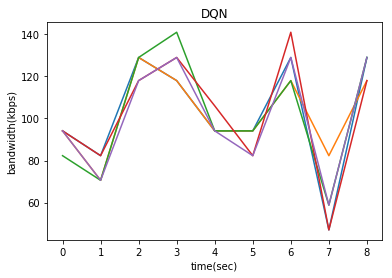

In [35]:
#正式画图
fig = plt.figure()
plt.title('DQN')
plt.ylabel('bandwidth(kbps)')
plt.xlabel('time(sec)')
for index in flows:
    plt.plot(flows[index][1:-1])
plt.savefig("DQN.png")
plt.show()